# 12、pandas高级应用
## 12.1 分类数据
### 12.1.1 背景和目的

In [1]:
import numpy as np
import pandas as pd

In [2]:
values = pd.Series(['apple','orange','apple','apple'] * 2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [3]:
#表中有些数值包含重复值的时候，unique和value_counts,可以从数组
#中提取不同的值，并计算频率。
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [4]:
pd.value_counts(values)

apple     6
orange    2
dtype: int64

In [5]:
values = pd.Series([0,1,0,0] * 2)
dim = pd.Series(['apple','orange'])

In [6]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

用整数表示的方法称为分类 或 字典编码 表示法。
分类表示可以哎进行分析的时候，提高性能。
* 重命名分类
* 加入一个新的分类，不改变已存在的分类顺序即位置

### 12.1.2pandas的分类类型

In [7]:
fruits = ['apple','apple','orange','orange']  * 2
N = len(fruits)

In [8]:
df = pd.DataFrame({'fruit':fruits,
                  'basket_id':np.arange(N),
                  'count':np.random.randint(3,15,size=N),
                  'weight':np.random.uniform(0,4,size=N)},
                  columns=['fruit','basket_id','count','weight'])
df

,fruit,basket_id,count,weight
0,apple,0,13,1.723225
1,apple,1,13,2.148300
2,orange,2,14,2.271876
3,orange,3,12,0.006258
4,apple,4,7,1.021834
5,apple,5,8,1.351098
6,orange,6,5,1.132469
7,orange,7,6,1.731281


In [9]:
fruit_Cat = df['fruit'].astype('category')
fruit_Cat

0     apple
1     apple
2    orange
3    orange
4     apple
5     apple
6    orange
7    orange
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [10]:
type(fruit_Cat)

pandas.core.series.Series

In [11]:
#分类对象
c = fruit_Cat.values
type(c)

pandas.core.arrays.categorical.Categorical

In [12]:
#分类对象的编码对应的意义
c.categories

Index(['apple', 'orange'], dtype='object')

In [13]:
#分类对象的编码
c.codes

array([0, 0, 1, 1, 0, 0, 1, 1], dtype=int8)

In [14]:
#将DataFrame的列通过分配转换结果，转换为分类。
df['fruit'] = df['fruit'].astype('category')
df.fruit

0     apple
1     apple
2    orange
3    orange
4     apple
5     apple
6    orange
7    orange
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

### 12.1.3用分类进行计算

In [15]:
np.random.seed(1234)

In [16]:
draws = np.random.randn(1000)
draws[:5]

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873])

In [17]:
#计算draws的分位面元
bins = pd.qcut(draws,4)
bins

[(0.0178, 0.669], (-3.565, -0.624], (0.669, 2.764], (-0.624, 0.0178], (-3.565, -0.624], ..., (0.0178, 0.669], (0.669, 2.764], (0.0178, 0.669], (0.669, 2.764], (-3.565, -0.624]]
Length: 1000
Categories (4, interval[float64]): [(-3.565, -0.624] < (-0.624, 0.0178] < (0.0178, 0.669] < (0.669, 2.764]]

In [18]:
#用labels参数来分位
bins = pd.qcut(draws,4,labels=['level1','level2','level3','level4'])
bins

[level3, level1, level4, level2, level1, ..., level3, level4, level3, level4, level1]
Length: 1000
Categories (4, object): [level1 < level2 < level3 < level4]

In [19]:
bins.codes[:10]

array([2, 0, 3, 1, 0, 3, 3, 0, 1, 0], dtype=int8)

In [20]:
bins = pd.Series(bins,name='quartile')

In [23]:
results = (pd.Series(draws)
           .groupby(bins)
           .agg(['count','min','max'])
           .reset_index())
results

,quartile,count,min,max
0,level1,250,-3.563517,-0.624589
1,level2,250,-0.624230,0.017467
2,level3,250,0.018055,0.668488
3,level4,250,0.669760,2.763844


In [24]:
results['quartile']

0    level1
1    level2
2    level3
3    level4
Name: quartile, dtype: category
Categories (4, object): [level1 < level2 < level3 < level4]

### 12.1.4 用分类提高性能
数据量大的时候。

In [26]:
N= 10000000
draws = pd.Series(np.random.randn(N))
labels = pd.Series(['fo','bar','ba','qu'] * (N // 4))

In [28]:
categpries = labels.astype('category')

In [30]:
labels.memory_usage()

80000080

In [31]:
categpries.memory_usage()

10000272

### 12.1.5分类方法

In [2]:
s=pd.Series(['a','b','c','d'] * 2)
cat_s = s.astype('category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

In [4]:
print(cat_s.cat.codes)
print(cat_s.cat.categories)

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8
Index(['a', 'b', 'c', 'd'], dtype='object')


In [5]:
cat_s.value_counts()

d    2
c    2
b    2
a    2
dtype: int64

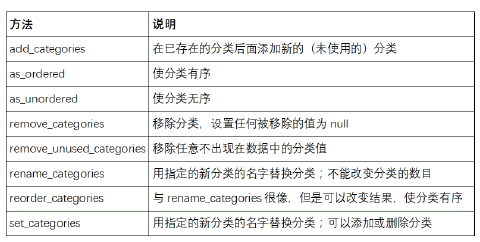

### 12.1.6为建模创建虚拟变量

In [6]:
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


## 12.2 GroupBy高级应用
### 12.2.1分组转换和“解封”GroupBy
* transform函数使用

In [9]:
df = pd.DataFrame({'key':['a','b','c'] * 4,
                  'value': np.arange(12.)})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [10]:
g = df.groupby('key').value
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [14]:
g.transform(lambda x: x.mean())

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [15]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [16]:
g.transform(lambda x : x*2)

0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64

In [20]:
def normalize(x):
    return (x - x.mean()) / x.std()

In [22]:
g.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

## 12.2.2分类的时间重采样

In [23]:
times = pd.date_range('2019-05-01 00:00:00',freq='1min',periods=15)
times

DatetimeIndex(['2019-05-01 00:00:00', '2019-05-01 00:01:00',
               '2019-05-01 00:02:00', '2019-05-01 00:03:00',
               '2019-05-01 00:04:00', '2019-05-01 00:05:00',
               '2019-05-01 00:06:00', '2019-05-01 00:07:00',
               '2019-05-01 00:08:00', '2019-05-01 00:09:00',
               '2019-05-01 00:10:00', '2019-05-01 00:11:00',
               '2019-05-01 00:12:00', '2019-05-01 00:13:00',
               '2019-05-01 00:14:00'],
              dtype='datetime64[ns]', freq='T')

In [24]:
df = pd.DataFrame({'time':times,
                  'value':np.arange(15)})
df

,time,value
0,2019-05-01 00:00:00,0
1,2019-05-01 00:01:00,1
2,2019-05-01 00:02:00,2
3,2019-05-01 00:03:00,3
4,2019-05-01 00:04:00,4
5,2019-05-01 00:05:00,5
6,2019-05-01 00:06:00,6
7,2019-05-01 00:07:00,7
8,2019-05-01 00:08:00,8
9,2019-05-01 00:09:00,9


In [26]:
df.set_index('time').resample('5min').count()


,value
time,
2019-05-01 00:00:00,5
2019-05-01 00:05:00,5
2019-05-01 00:10:00,5


In [27]:
df2 = pd.DataFrame({'time':times.repeat(3),
                   'key':np.tile(['a','b','c'],15),
                   'value':np.arange(15 *3.)})
df2

,time,key,value
0,2019-05-01 00:00:00,a,0.0
1,2019-05-01 00:00:00,b,1.0
2,2019-05-01 00:00:00,c,2.0
3,2019-05-01 00:01:00,a,3.0
4,2019-05-01 00:01:00,b,4.0
5,2019-05-01 00:01:00,c,5.0
6,2019-05-01 00:02:00,a,6.0
7,2019-05-01 00:02:00,b,7.0
8,2019-05-01 00:02:00,c,8.0
9,2019-05-01 00:03:00,a,9.0


In [29]:
time_key = pd.TimeGrouper('5min')
#time_key

C:\Users\Zelon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


## 12.3链式编程技术
### 12.3.1管道方法
* 管道函数：1、函数调用:f(df)   ,   df.pipe(f)

-------------------------------------------
# 作业2

### 练习1 了解数据，探索chipotle快餐数据


In [1]:
import pandas as pd

In [2]:
fpath = 'Task7Data/'
fname = 'chipotle.tsv'
filepath = fpath + fname
filepath

'Task7Data/chipotle.tsv'

In [3]:
chipo = pd.read_csv(filepath,sep='\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
print(chipo.shape[0]) #行数
print(chipo.shape[1]) #列数

4622
5


In [5]:
chipo.columns #列名

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [6]:
chipo.index #数据集索引

RangeIndex(start=0, stop=4622, step=1)

In [7]:
c = chipo[['item_name','quantity']].groupby(['item_name'],as_index=False).agg({'quantity':sum})
print(c)
c.sort_values(['quantity'],ascending=False,inplace=True)
c.head()

                                item_name  quantity
0                       6 Pack Soft Drink        55
1                           Barbacoa Bowl        66
2                        Barbacoa Burrito        91
3                   Barbacoa Crispy Tacos        12
4                     Barbacoa Salad Bowl        10
5                     Barbacoa Soft Tacos        25
6                           Bottled Water       211
7                                    Bowl         4
8                                 Burrito         6
9                             Canned Soda       126
10                      Canned Soft Drink       351
11                          Carnitas Bowl        71
12                       Carnitas Burrito        60
13                  Carnitas Crispy Tacos         8
14                         Carnitas Salad         1
15                    Carnitas Salad Bowl         6
16                    Carnitas Soft Tacos        40
17                           Chicken Bowl       761
18          

,item_name,quantity
17,Chicken Bowl,761
18,Chicken Burrito,591
25,Chips and Guacamole,506
39,Steak Burrito,386
10,Canned Soft Drink,351


In [8]:
chipo['item_name'].nunique()  #被下单的商品数量

50

In [9]:
chipo.choice_description.value_counts().head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

In [10]:
total_items_order = chipo['quantity'].sum()
total_items_order

4972

In [12]:
dollarizer = lambda x : float(x[1:-1])
chipo['item_price'] = chipo['item_price'].apply(dollarizer)

In [13]:
chipo['sub_total'] = round(chipo['item_price'] * chipo['quantity'] , 2)
chipo['sub_total'].sum()
                           

39237.02

In [14]:
chipo['order_id'].nunique()

1834

In [16]:
#每一单对应的平均价
chipo[['order_id','sub_total']].groupby(by=['order_id']).agg({
    'sub_total':'sum'})['sub_total'].mean()

21.394231188658654

In [18]:
#出售商品的品种数量
chipo['item_name'].nunique()

50

In [25]:
t = pd.DataFrame(chipo[['order_id','sub_total']].groupby(by=['order_id']).agg({'sub_total':'sum'}))
t

,sub_total
order_id,
1,11.56
2,33.96
3,12.67
4,21.00
5,13.70
6,17.50
7,15.70
8,10.88
9,12.85


In [26]:
chipo[['order_id','sub_total']].groupby(by=['order_id']).sum().mean()

sub_total    21.394231
dtype: float64

## 2012欧洲杯数据

In [27]:
import pandas as pd

In [28]:
fpath = 'Task7Data/'
fname = 'Euro2012_stats.csv'
filepath = fpath + fname
filepath

'Task7Data/Euro2012_stats.csv'

In [29]:
euro12 = pd.read_csv(filepath)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [30]:
euro12.Goals[:5]

0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64

In [31]:
euro12['Goals'][:5]

0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64

In [39]:
euro12.loc[:5,'Goals']

0     4
1     4
2     4
3     5
4     3
5    10
Name: Goals, dtype: int64

In [40]:
#参赛队伍数量
euro12.shape[0]

16

In [41]:
#数据集列数
euro12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
Team                          16 non-null object
Goals                         16 non-null int64
Shots on target               16 non-null int64
Shots off target              16 non-null int64
Shooting Accuracy             16 non-null object
% Goals-to-shots              16 non-null object
Total shots (inc. Blocked)    16 non-null int64
Hit Woodwork                  16 non-null int64
Penalty goals                 16 non-null int64
Penalties not scored          16 non-null int64
Headed goals                  16 non-null int64
Passes                        16 non-null int64
Passes completed              16 non-null int64
Passing Accuracy              16 non-null object
Touches                       16 non-null int64
Crosses                       16 non-null int64
Dribbles                      16 non-null int64
Corners Taken                 16 non-null int64
Tackles                      

In [43]:
discipine = euro12[['Team','Yellow Cards','Red Cards']]
discipine

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [45]:
discipine.sort_values(['Red Cards','Yellow Cards'],ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [46]:
#球队得黄牌数的平均值
round(discipine['Yellow Cards'].mean())

7

In [47]:
#进球数超过6的球队
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [51]:
#球队名字以C开头的队伍
euro12[euro12.Team.str.startswith('C')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19


In [56]:
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [57]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [58]:
euro12.loc[euro12.Team.isin(['England','Italy','Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## 酒类消费数据